## tasks :
- derive coverage by opening file as alignment and getting its length (seems to be so by biopython msa obj)
- may be it's better to use pandas df from the very beginning

in the first bunch of data


- C >>> T
- G >>> A

**IMPORTANT NOTE: **
- it seems that you need calculate frequency in all possible duplexes 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2877740/pdf/ppat.1000928.pdf

In [62]:
ls data

 Том в устройстве C имеет метку OS
 Серийный номер тома: 7E4D-BE36

 Содержимое папки C:\Users\babin.PCR_INT\GitHub\apobec\data

30.11.2018  11:11    <DIR>          .
30.11.2018  11:11    <DIR>          ..
30.11.2018  11:08         3 405 989 DK-A3A_S130_L001_R1_001 assembled to HBV_0.fasta
30.11.2018  11:08         3 292 012 DK-A3B_S131_L001_R2_001 assembled to HBV_0.fasta
30.11.2018  11:08         3 938 955 DK-AID_S133_L001_R1_001 assembled to HBV_0.fasta
               3 файлов     10 636 956 байт
               2 папок  895 600 590 848 байт свободно


In [71]:
from Bio.SeqIO.FastaIO import SimpleFastaParser  # low level fast fasta parser
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [173]:

def get_duplex_pos(in_file):
    
    with open(in_file) as in_handle:
        for title, seq in SimpleFastaParser(in_handle):
            seq = seq
            break
    
    start = 0
    stop = 2
    
    d = {}
    
    while stop < len(seq):
        duplex = seq[start : stop]
        if duplex[0] == 'C':
            d[start] = {'ref_duplex' : duplex, 'A' : 0, 'T' : 0, 'G' : 0, 'C' : 0, '-' : 0}
        start += 1
        stop += 1
        
    return d


In [ ]:

det_coverage



In [174]:

def collect_snp(in_file, d):
    cov = 0 
    with open(in_file) as in_handle:
        reads = SimpleFastaParser(in_handle)
        for record in reads:
            cov += 1
            read = record[1] 
            for duplex_pos in d.keys():
                
                
                # here's some thought:
                # 1. if you crop the variants where second pos in the duplex in the read is diff, you get 
                # twice as less variants as if you drop the expression after 'and' 
                # so, do we really need just to count snps or context ?
                # check it out : it seem work as well 
                if read[duplex_pos] != 'C' and read[duplex_pos + 1] == d[duplex_pos]['ref_duplex'][1]:
                    snp = read[duplex_pos]    
                    
                    
                    d[duplex_pos][snp] += 1
            
        
    return  d, cov

In [175]:
d = get_duplex_pos('./data/DK-A3A_S130_L001_R1_001 assembled to HBV_0.fasta')

In [176]:
d_up, cov = collect_snp('./data/DK-A3A_S130_L001_R1_001 assembled to HBV_0.fasta', d)

In [117]:
d_up

{3: {'ref_duplex': 'CT', 'A': 9, 'T': 12, 'G': 12, 'C': 0, '-': 22},
 6: {'ref_duplex': 'CT', 'A': 16, 'T': 11, 'G': 8, 'C': 0, '-': 1},
 11: {'ref_duplex': 'CT', 'A': 5, 'T': 7, 'G': 3, 'C': 0, '-': 0},
 16: {'ref_duplex': 'CT', 'A': 9, 'T': 5, 'G': 4, 'C': 0, '-': 0},
 19: {'ref_duplex': 'CC', 'A': 8, 'T': 12, 'G': 2, 'C': 0, '-': 0},
 20: {'ref_duplex': 'CA', 'A': 17, 'T': 22, 'G': 4, 'C': 0, '-': 0},
 23: {'ref_duplex': 'CT', 'A': 16, 'T': 18, 'G': 6, 'C': 0, '-': 1},
 29: {'ref_duplex': 'CC', 'A': 16, 'T': 25, 'G': 3, 'C': 0, '-': 5},
 30: {'ref_duplex': 'CT', 'A': 15, 'T': 26, 'G': 8, 'C': 0, '-': 6},
 33: {'ref_duplex': 'CG', 'A': 28, 'T': 127, 'G': 4, 'C': 0, '-': 6},
 35: {'ref_duplex': 'CG', 'A': 25, 'T': 167, 'G': 6, 'C': 0, '-': 21},
 40: {'ref_duplex': 'CG', 'A': 12, 'T': 37, 'G': 5, 'C': 0, '-': 19},
 43: {'ref_duplex': 'CC', 'A': 39, 'T': 16, 'G': 3, 'C': 0, '-': 18},
 44: {'ref_duplex': 'CT', 'A': 36, 'T': 31, 'G': 5, 'C': 0, '-': 19},
 53: {'ref_duplex': 'CG', 'A': 12,

In [118]:
cov

12666

In [177]:
a_data = []
t_data = []
g_data = []
c_data = []

for key in d_up.keys():
    a_data.append(d_up[key]['A'])
    t_data.append(d_up[key]['T'])
    g_data.append(d_up[key]['G'])
    c_data.append(d_up[key]['C'])
    
    

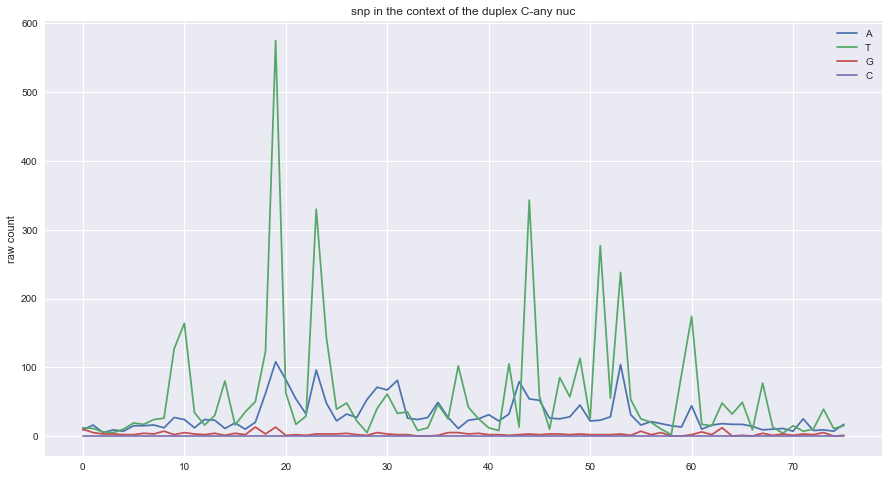

In [178]:
plt.figure(figsize=(15, 8))
plt.plot(a_data, label="A")
plt.plot(t_data, label="T")
plt.plot(g_data, label="G")
plt.plot(c_data, label="C")
plt.title('snp in the context of the duplex C-any nuc')
plt.ylabel('raw count')
plt.legend()

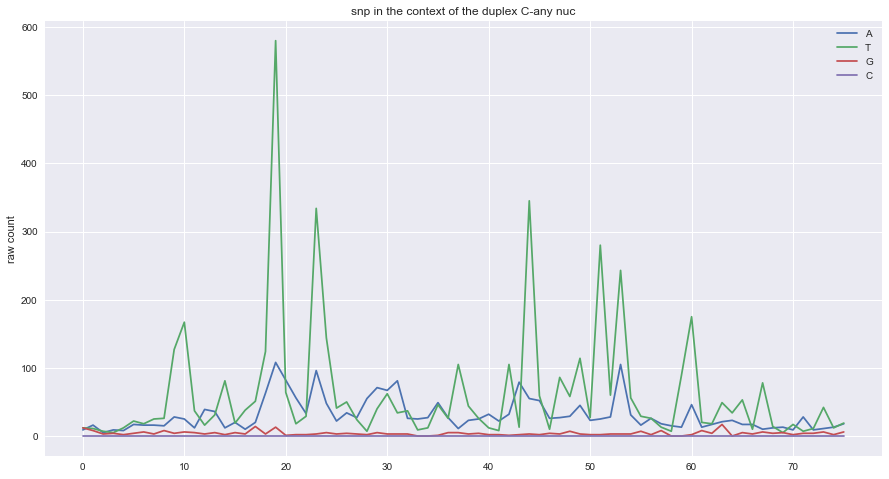

In [120]:
plt.figure(figsize=(15, 8))
plt.plot(a_data, label="A")
plt.plot(t_data, label="T")
plt.plot(g_data, label="G")
plt.plot(c_data, label="C")
plt.title('snp in the context of the duplex C-any nuc')
plt.ylabel('raw count')
plt.legend()

In [169]:

def get_duplex_pos(in_file):
    
    with open(in_file) as in_handle:
        for title, seq in SimpleFastaParser(in_handle):
            seq = seq
            break
    
    start = 0
    stop = 2
    
    d = {}
    
    while stop < len(seq):
        duplex = seq[start : stop]
        if duplex[0] == 'G':
            d[start] = {'ref_duplex' : duplex, 'A' : 0, 'T' : 0, 'G' : 0, 'C' : 0, '-' : 0}
        start += 1
        stop += 1
        
    return d


In [170]:

def collect_snp(in_file, d):
    cov = 0 
    with open(in_file) as in_handle:
        reads = SimpleFastaParser(in_handle)
        for record in reads:
            cov += 1
            read = record[1] 
            for duplex_pos in d.keys():
                
                if read[duplex_pos] != 'G':
                    snp = read[duplex_pos]    
                    
                    
                    d[duplex_pos][snp] += 1
            
        
    return  d, cov

In [171]:
d = get_duplex_pos('./data/DK-A3A_S130_L001_R1_001 assembled to HBV_0.fasta')

In [172]:
d_up_1, cov = collect_snp('./data/DK-A3A_S130_L001_R1_001 assembled to HBV_0.fasta', d)

In [85]:
d_up

{1: {'ref_duplex': 'GG', 'A': 88, 'T': 20, 'G': 0, 'C': 11, '-': 130},
 2: {'ref_duplex': 'GC', 'A': 18, 'T': 25, 'G': 0, 'C': 17, '-': 54},
 5: {'ref_duplex': 'GC', 'A': 15, 'T': 17, 'G': 0, 'C': 4, '-': 2},
 9: {'ref_duplex': 'GG', 'A': 21, 'T': 18, 'G': 0, 'C': 2, '-': 0},
 10: {'ref_duplex': 'GC', 'A': 4, 'T': 21, 'G': 0, 'C': 8, '-': 1},
 13: {'ref_duplex': 'GT', 'A': 8, 'T': 8, 'G': 0, 'C': 5, '-': 0},
 15: {'ref_duplex': 'GC', 'A': 8, 'T': 10, 'G': 0, 'C': 4, '-': 0},
 18: {'ref_duplex': 'GC', 'A': 8, 'T': 11, 'G': 0, 'C': 5, '-': 0},
 25: {'ref_duplex': 'GG', 'A': 86, 'T': 20, 'G': 0, 'C': 4, '-': 2},
 26: {'ref_duplex': 'GA', 'A': 21, 'T': 29, 'G': 0, 'C': 4, '-': 4},
 32: {'ref_duplex': 'GC', 'A': 64, 'T': 39, 'G': 0, 'C': 7, '-': 6},
 34: {'ref_duplex': 'GC', 'A': 43, 'T': 45, 'G': 0, 'C': 3, '-': 7},
 36: {'ref_duplex': 'GG', 'A': 73, 'T': 31, 'G': 0, 'C': 5, '-': 21},
 37: {'ref_duplex': 'GG', 'A': 79, 'T': 15, 'G': 0, 'C': 8, '-': 19},
 38: {'ref_duplex': 'GA', 'A': 25, '

In [91]:
a_data = []
t_data = []
g_data = []
c_data = []
gap_data = []

for key in d_up.keys():
    a_data.append(d_up[key]['A'])
    t_data.append(d_up[key]['T'])
    g_data.append(d_up[key]['G'])
    c_data.append(d_up[key]['C'])
    gap_data.append(d_up[key]['-'])
    

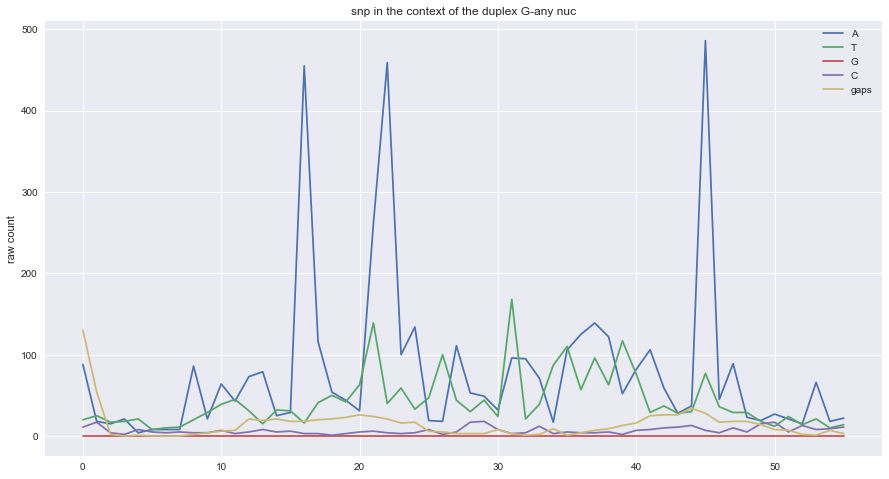

In [92]:
plt.figure(figsize=(15, 8))
plt.plot(a_data, label="A")
plt.plot(t_data, label="T")
plt.plot(g_data, label="G")
plt.plot(c_data, label="C")
plt.plot(gap_data, label="gaps")
plt.title('snp in the context of the duplex G-any nuc')
plt.ylabel('raw count')
plt.legend()

** here are duplex types. derive there frequency and plot them **

In [123]:
c_duplex_types = ['CA', 'CT', 'CG', 'CC']
g_duplex_types = ['GA', 'GT', 'GG', 'GC']

In [124]:
d_up

{3: {'ref_duplex': 'CT', 'A': 9, 'T': 12, 'G': 12, 'C': 0, '-': 22},
 6: {'ref_duplex': 'CT', 'A': 16, 'T': 11, 'G': 8, 'C': 0, '-': 1},
 11: {'ref_duplex': 'CT', 'A': 5, 'T': 7, 'G': 3, 'C': 0, '-': 0},
 16: {'ref_duplex': 'CT', 'A': 9, 'T': 5, 'G': 4, 'C': 0, '-': 0},
 19: {'ref_duplex': 'CC', 'A': 8, 'T': 12, 'G': 2, 'C': 0, '-': 0},
 20: {'ref_duplex': 'CA', 'A': 17, 'T': 22, 'G': 4, 'C': 0, '-': 0},
 23: {'ref_duplex': 'CT', 'A': 16, 'T': 18, 'G': 6, 'C': 0, '-': 1},
 29: {'ref_duplex': 'CC', 'A': 16, 'T': 25, 'G': 3, 'C': 0, '-': 5},
 30: {'ref_duplex': 'CT', 'A': 15, 'T': 26, 'G': 8, 'C': 0, '-': 6},
 33: {'ref_duplex': 'CG', 'A': 28, 'T': 127, 'G': 4, 'C': 0, '-': 6},
 35: {'ref_duplex': 'CG', 'A': 25, 'T': 167, 'G': 6, 'C': 0, '-': 21},
 40: {'ref_duplex': 'CG', 'A': 12, 'T': 37, 'G': 5, 'C': 0, '-': 19},
 43: {'ref_duplex': 'CC', 'A': 39, 'T': 16, 'G': 3, 'C': 0, '-': 18},
 44: {'ref_duplex': 'CT', 'A': 36, 'T': 31, 'G': 5, 'C': 0, '-': 19},
 53: {'ref_duplex': 'CG', 'A': 12,

In [125]:
import pandas as pd

In [179]:
df = pd.DataFrame(d_up)

In [180]:
df = df.T

In [181]:
context_data = df.groupby('ref_duplex').sum()

In [182]:
context_data

,-,A,C,G,T
ref_duplex,,,,,
CA,13,76,0,6,364
CC,7,488,0,74,1035
CG,42,981,0,78,2794
CT,40,700,0,73,446


In [183]:
context_data.drop(['-'], axis=1, inplace=True)
context_data.drop(['C'], axis=1, inplace=True)

In [185]:
context_data

,A,G,T
ref_duplex,,,
CA,76,6,364
CC,488,74,1035
CG,981,78,2794
CT,700,73,446


In [186]:
context_data.loc['CA', : ]

A     76
G      6
T    364
Name: CA, dtype: int64

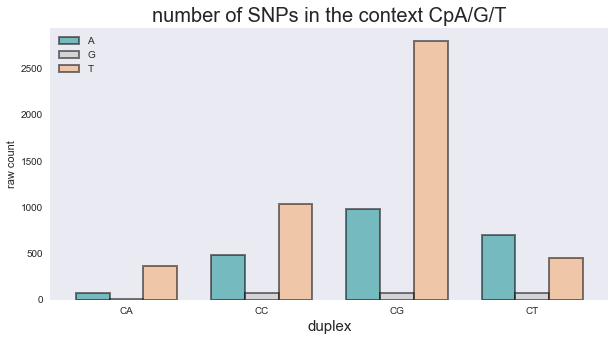

In [198]:
# Setting the positions and width for the bars
pos = list(range(len(context_data['A']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        context_data['A'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='darkcyan', 
        edgecolor='black',
        lw=2,
        # with label the first value in first_name
        label=context_data.index[0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        context_data['G'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='silver', 
        edgecolor='black',
        lw=2,
        # with label the second value in first_name
        label=context_data.index[1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        context_data['T'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='sandybrown', 
        edgecolor='black',
        lw=2,
        # with label the third value in first_name
        label=context_data.index[2]) 

# Set the y axis label
ax.set_ylabel('raw count')
ax.set_xlabel('duplex', fontsize=15)
# Set the chart's title
ax.set_title('number of SNPs in the context CpA/G/T', fontsize='20')

# Set the position of the x ticks
ax.set_xticks([p + 1.0 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(context_data.index)

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend([context_data.columns[0], 
            context_data.columns[1],
            context_data.columns[2]], loc='upper left')

plt.grid()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

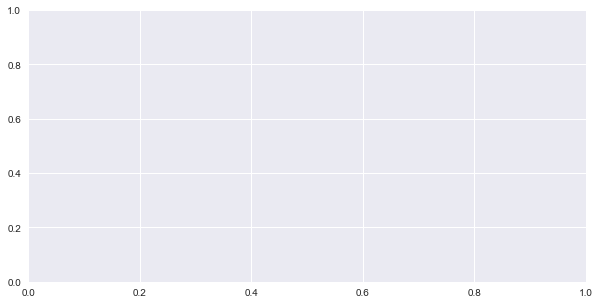

In [162]:
fig = plt.figure(figsize=(10, 5))

bar_width = 0.2
# bars positions
index_data_1 = [0, 1, 2, 3]
index_data_2 = [x + bar_width for x in index_data_1] 
index_data_3 = [x + bar_width for x in index_data_2] 
index_data_4 = [x + bar_width for x in index_data_3] 

plt.bar(index_data_1, context_data.loc['CA', : ], bar_width)
plt.bar(index_data_2, context_data.loc['CC', : ], bar_width)
plt.bar(index_data_3, context_data.loc['CG', : ], bar_width)
plt.bar(index_data_4, context_data.loc['CT', : ], bar_width)

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(10, 5))

data1 = [5, 10, 15, 25]
data2 = [30, 20, 10, 1]

bar_width = 0.2
# position of the bars for data1
index_data1 = [0, 1, 2, 3] 
# position of the bars for data2 : step right on the value of bar_width
index_data2 = [x + bar_width for x in index_data1] 

plt.bar(index_data1, data1, bar_width)
plt.bar(index_data2, data2, bar_width)

# just calculating position of the ticks on the x-axis
# shift position left on the value of bar_width divided by 2
tick_position = [x + bar_width / 2 for x in index_data1] 
plt.xticks(tick_position, ["1st group", "2nd group", "3rd group", "4th group"], fontsize=15)
plt.title("bars side by side", fontsize=20)
plt.show()

In [142]:
ca = context_data.loc['CA', :].tolist()

In [143]:
ca

[82, 11, 375]

<BarContainer object of 3 artists>

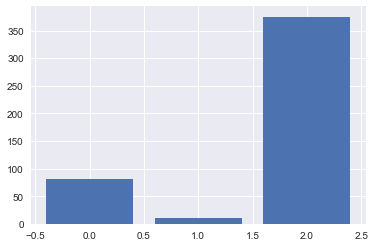

In [144]:
plt.bar(range(0, len(ca)), ca)

In [152]:
context_data['context'] = context_data.index

In [145]:
 tips = sns.load_dataset("tips")

In [146]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [ ]:
>> ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)